# Tratamento Inicial de Dados do ENEM 2022

## Objetivo

O dataset do ENEM é bem grande, e possui muitos parâmetros desnecessários para esse estudo, além de valores vazios. 

## Importanto Dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.csv", encoding="iso-8859-1", delimiter=";")

In [3]:
df

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,2022,3,M,1,1,1,2,0,2,...,B,A,B,B,B,A,E,A,A,B
3476101,210057205644,2022,14,F,2,1,1,2,0,2,...,A,A,A,B,A,A,C,A,B,B
3476102,210056699189,2022,2,M,1,1,1,2,0,2,...,B,A,B,C,B,A,E,A,B,B
3476103,210056983033,2022,3,M,1,3,1,2,0,3,...,B,A,B,D,A,A,E,A,B,B


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

Como podemos ver, a tabela tem 76 colunas. Muitas delas não são relevantes para a nossa análise (ex: vetor com as questões que o inscrito marcou). Outras possues um valor marcado com algo quando seria mais interessante se fosse NA (ex: valor 1 no tipo de escola quer dizer que não respondeu).<br><br>
A partir de agora, iremos eliminar aquelas colunas julgadas como não relevantes, e transformar os dados caso seja necessário.<br><br>
Tratamentos mais avançados ou bem específicos da análise que for feita serão feitos num código a parte.

## Eliminando Colunas Desnecessárias

As colunas podem ser vistas no diretório DICIONÁRIO.

In [5]:
# Todos os dados são do ENEM 2022
df.drop("NU_ANO", axis=1, inplace=True)

In [6]:
# O Estado Civil não é considerado relevante para as análises que serão feitas. 
# Ele não dá informações relevantes sobre o desempenho do candidato da prova, e nem possui relação com cotas
# Ano de conclusão de ensino médio também (o que é relevante é se está fazendo ou não)
df.drop("TP_ESTADO_CIVIL", axis=1, inplace=True)
df.drop("TP_ANO_CONCLUIU", axis=1, inplace=True)

In [7]:
# Quanto à região da escola, algumas informações podem ser relevantes
# Para esse trabalho, será considerado que apenas a UF da escola é relevante. O município é uma informação muito específica, e vai gerar um número muito alto de classes.
# Informações como localização da escola e estado de funcionamento podem ser bem legais, entretanto, para limitar o número de parâmetros, será considerado que saber se a escola
# é pública ou privada e em qual UF ela fica são informações suficientes
df.drop("CO_MUNICIPIO_ESC", axis=1, inplace=True)
df.drop("NO_MUNICIPIO_ESC", axis=1, inplace=True)
df.drop("TP_DEPENDENCIA_ADM_ESC", axis=1, inplace=True)
df.drop("CO_UF_ESC", axis=1, inplace=True)
df.drop("TP_LOCALIZACAO_ESC", axis=1, inplace=True)
df.drop("TP_SIT_FUNC_ESC", axis=1, inplace=True)

In [8]:
# Todos os dados sobre o local da prova serão considerados irrelevantes
df.drop("CO_MUNICIPIO_PROVA", axis=1, inplace=True)
df.drop("NO_MUNICIPIO_PROVA", axis=1, inplace=True)
df.drop("CO_UF_PROVA", axis=1, inplace=True)
df.drop("SG_UF_PROVA", axis=1, inplace=True)

In [9]:
# Sobre dados da prova objetivo, a informação sobre a presença do participante é desnecessária (podemos saber isso olhando se a nota está como NA ou não)
# Dados sobre qual o código da prova também não são considerados relevantes
# O vetor de respostas será eliminado, pois não iremos analisar quais questões cada aluno errou (motivo análogo para eliminr o vetor de gabarito)
# A língua estrangeira será eliminada também, pois ela é considerada irrelevante para as análises que serão feitas
df.drop("TP_PRESENCA_CN", axis=1, inplace=True)
df.drop("TP_PRESENCA_CH", axis=1, inplace=True)
df.drop("TP_PRESENCA_LC", axis=1, inplace=True)
df.drop("TP_PRESENCA_MT", axis=1, inplace=True)

df.drop("CO_PROVA_CN", axis=1, inplace=True)
df.drop("CO_PROVA_CH", axis=1, inplace=True)
df.drop("CO_PROVA_LC", axis=1, inplace=True)
df.drop("CO_PROVA_MT", axis=1, inplace=True)

df.drop("TX_RESPOSTAS_CN", axis=1, inplace=True)
df.drop("TX_RESPOSTAS_CH", axis=1, inplace=True)
df.drop("TX_RESPOSTAS_LC", axis=1, inplace=True)
df.drop("TX_RESPOSTAS_MT", axis=1, inplace=True)

df.drop("TP_LINGUA", axis=1, inplace=True)

df.drop("TX_GABARITO_CN", axis=1, inplace=True)
df.drop("TX_GABARITO_CH", axis=1, inplace=True)
df.drop("TX_GABARITO_LC", axis=1, inplace=True)
df.drop("TX_GABARITO_MT", axis=1, inplace=True)

In [10]:
# Sobre os dados da Redação, o único que interessa é a nota total da redação
df.drop("TP_STATUS_REDACAO", axis=1, inplace=True)

df.drop("NU_NOTA_COMP1", axis=1, inplace=True)
df.drop("NU_NOTA_COMP2", axis=1, inplace=True)
df.drop("NU_NOTA_COMP3", axis=1, inplace=True)
df.drop("NU_NOTA_COMP4", axis=1, inplace=True)
df.drop("NU_NOTA_COMP5", axis=1, inplace=True)

In [11]:
# Sobre o Formulário Socioeconômico, há várias informações específicas que podem ser interessantes em análises específicas
# Para esse trabalho, a única considerada relevante é sobre a renda familiar (Questão 6). As outras serão eliminadas
eliminar = [f"Q{i:03d}" for i in range(1, 26)]  # as colunas vão de Q001 até Q025
eliminar.remove("Q006")  # questão da renda familiar
for col in eliminar:
    df.drop(col, axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   NU_INSCRICAO      int64  
 1   TP_FAIXA_ETARIA   int64  
 2   TP_SEXO           object 
 3   TP_COR_RACA       int64  
 4   TP_NACIONALIDADE  int64  
 5   TP_ST_CONCLUSAO   int64  
 6   TP_ESCOLA         int64  
 7   TP_ENSINO         float64
 8   IN_TREINEIRO      int64  
 9   SG_UF_ESC         object 
 10  NU_NOTA_CN        float64
 11  NU_NOTA_CH        float64
 12  NU_NOTA_LC        float64
 13  NU_NOTA_MT        float64
 14  NU_NOTA_REDACAO   float64
 15  Q006              object 
dtypes: float64(6), int64(7), object(3)
memory usage: 424.3+ MB


Após as eliminações, temos um total de 16 colunas.
<br><br>
Entretanto, muitas dessas possues variáveis categóricas, e portanto, precisam receber um tratamento a mais.

## Tratamento dos Dados

A prioridade é fazer o tratamento das variáveis categóricas. Além disso, algumas colunas possuem valores que deveriam ser NA, mas estão com algum outro valor (ex: na coluna de COR/RAÇA, 0 indica que não declarou resposta).

### Remoção de NA

In [13]:
# Células que envolvem algum valor "não informado" serão alteradas para NA
df["TP_COR_RACA"].replace({0: np.nan, 6: np.nan}, inplace=True)
df["TP_NACIONALIDADE"].replace(0, np.nan, inplace=True)
df["TP_ESCOLA"].replace(1, np.nan, inplace=True)

In [14]:
# Como agora só há duas opções de escola (Pública ou Privada), dá para usar só dois valores
# Pública = 1 e Privada = 0 (pode ser interpretado como "elegível à cota?")
df["TP_ESCOLA"].replace({2: 1, 3: 0}, inplace=True)
df["TP_ESCOLA"].value_counts()

TP_ESCOLA
1.0    1105355
0.0     212205
Name: count, dtype: int64

In [15]:
# Quantos valores ainda vamos ter se dropar valores na?
original = len(df)
removido = df.dropna().shape[0]
print(f"Original: {original}")
print(f"Após remoção: {removido}")
print(f"Porcentagem do original: {round(100*removido/original, 2)}")

Original: 3476105
Após remoção: 669781
Porcentagem do original: 19.27


In [16]:
# Deletando valores na
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669781 entries, 40 to 3476102
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NU_INSCRICAO      669781 non-null  int64  
 1   TP_FAIXA_ETARIA   669781 non-null  int64  
 2   TP_SEXO           669781 non-null  object 
 3   TP_COR_RACA       669781 non-null  float64
 4   TP_NACIONALIDADE  669781 non-null  float64
 5   TP_ST_CONCLUSAO   669781 non-null  int64  
 6   TP_ESCOLA         669781 non-null  float64
 7   TP_ENSINO         669781 non-null  float64
 8   IN_TREINEIRO      669781 non-null  int64  
 9   SG_UF_ESC         669781 non-null  object 
 10  NU_NOTA_CN        669781 non-null  float64
 11  NU_NOTA_CH        669781 non-null  float64
 12  NU_NOTA_LC        669781 non-null  float64
 13  NU_NOTA_MT        669781 non-null  float64
 14  NU_NOTA_REDACAO   669781 non-null  float64
 15  Q006              669781 non-null  object 
dtypes: float64(9), int64(4)

### Tratando Variáveis Categóricas

In [18]:
# Faixa etária já está no formato de Ordinal Encoding, então será mantida (por ter uma certa noção de ordem)
values = list(df["TP_FAIXA_ETARIA"].unique())
values.sort()
values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [19]:
# Sexo será alterado usando apenas uma coluna
# F -> 0, M -> 1
df["TP_SEXO"].replace({"F": 0, "M": 1}, inplace=True)
df["TP_SEXO"].unique()

array([0, 1])

In [20]:
df["TP_COR_RACA"].value_counts()

TP_COR_RACA
1.0    328473
3.0    265281
2.0     61609
4.0     11466
5.0      2952
Name: count, dtype: int64

In [21]:
# Cor/Raça precisa de One Hot encoding
one_hot = pd.get_dummies(df["TP_COR_RACA"], prefix="COR_RACA")
df = df.join(one_hot)
df.drop("TP_COR_RACA", axis=1, inplace=True)
df.columns

Index(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'SG_UF_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q006', 'COR_RACA_1.0', 'COR_RACA_2.0',
       'COR_RACA_3.0', 'COR_RACA_4.0', 'COR_RACA_5.0'],
      dtype='object')

In [22]:
df["TP_NACIONALIDADE"].value_counts()

TP_NACIONALIDADE
1.0    655438
2.0     11523
4.0      1676
3.0      1144
Name: count, dtype: int64

In [23]:
# Nacionalidade usa One Hot também
one_hot = pd.get_dummies(df["TP_NACIONALIDADE"], prefix="NACIONALIDADE")
df = df.join(one_hot)
df.drop("TP_NACIONALIDADE", axis=1, inplace=True)
df.columns

Index(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ST_CONCLUSAO',
       'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'SG_UF_ESC', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q006',
       'COR_RACA_1.0', 'COR_RACA_2.0', 'COR_RACA_3.0', 'COR_RACA_4.0',
       'COR_RACA_5.0', 'NACIONALIDADE_1.0', 'NACIONALIDADE_2.0',
       'NACIONALIDADE_3.0', 'NACIONALIDADE_4.0'],
      dtype='object')

In [24]:
# Ano de Conclusão do EM 
values = list(df["TP_ST_CONCLUSAO"].unique())
values.sort()
values

[2]

In [25]:
# Note que todos os participantes restantes estão no último ano do Ensino Médio. Portanto, essa coluna pode ser eliminada
df.drop("TP_ST_CONCLUSAO", axis=1, inplace=True)

In [26]:
# Tipo de Escola já foi corrigido
df["TP_ESCOLA"].unique()

array([1., 0.])

In [27]:
# Tipo de Ensinado será corrigido usando uma coluna
# 0 -> Ensino Regular, 1 -> Ensino Especial
df["TP_ENSINO"].replace({1: 0, 2: 1}, inplace=True)
df["TP_ENSINO"].unique()

array([0., 1.])

In [28]:
df["IN_TREINEIRO"].unique()

array([0])

In [29]:
# Como não há treineiros, essa coluna pode ser eliminada
df.drop("IN_TREINEIRO", axis=1, inplace=True)

In [30]:
# Número de UFs
len(df["SG_UF_ESC"].unique())

27

In [31]:
# UFs serão separadas por região
regioes = {
    "NORTE": ["AC", "RO", "AM", "RR", "PA", "AP", "TO"],
    "NORDESTE": ["MA", "PI", "BA", "CE", "RN", "PB", "PE", "AL", "SE"],
    "CENTROOESTE": ["MT", "GO", "MS", "DF"],
    "SUDESTE": ["MG", "ES", "RJ", "SP"],
    "SUL": ["PR", "SC", "RS"]
}
for regiao, UFs in regioes.items():
    df["SG_UF_ESC"].replace(UFs, regiao, inplace=True)
df["SG_UF_ESC"].unique()

array(['NORDESTE', 'SUDESTE', 'CENTROOESTE', 'NORTE', 'SUL'], dtype=object)

In [32]:
df["SG_UF_ESC"].value_counts()

SG_UF_ESC
SUDESTE        251265
NORDESTE       211248
SUL             88808
CENTROOESTE     62413
NORTE           56047
Name: count, dtype: int64

In [33]:
# One Hot Encoding da região
one_hot = pd.get_dummies(df["SG_UF_ESC"], prefix="REGIAO")
df = df.join(one_hot)
df.drop("SG_UF_ESC", axis=1, inplace=True)
df.columns

Index(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESCOLA', 'TP_ENSINO',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q006', 'COR_RACA_1.0', 'COR_RACA_2.0',
       'COR_RACA_3.0', 'COR_RACA_4.0', 'COR_RACA_5.0', 'NACIONALIDADE_1.0',
       'NACIONALIDADE_2.0', 'NACIONALIDADE_3.0', 'NACIONALIDADE_4.0',
       'REGIAO_CENTROOESTE', 'REGIAO_NORDESTE', 'REGIAO_NORTE',
       'REGIAO_SUDESTE', 'REGIAO_SUL'],
      dtype='object')

In [34]:
# Faixa Salarial
df["Q006"].value_counts()

Q006
B    157681
C     95658
D     77074
E     59293
H     48684
G     47253
F     36449
A     25361
I     20601
Q     15439
J     15317
L     14468
M     13694
O     11417
P     10823
K     10540
N     10029
Name: count, dtype: int64

In [35]:
# Q006 indica faixa salarial. Por ter noção de ordem, será usado Ordinal Encoding
conversao = {char: (ord(char) - ord("A") + 1) for char in "ABCDEFGHIJKLMNOPQ"}
df["Q006"].replace(conversao, inplace=True)
values = df["Q006"].unique()
values.sort()
values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [36]:
# Como df ficou após modificações
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669781 entries, 40 to 3476102
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NU_INSCRICAO        669781 non-null  int64  
 1   TP_FAIXA_ETARIA     669781 non-null  int64  
 2   TP_SEXO             669781 non-null  int64  
 3   TP_ESCOLA           669781 non-null  float64
 4   TP_ENSINO           669781 non-null  float64
 5   NU_NOTA_CN          669781 non-null  float64
 6   NU_NOTA_CH          669781 non-null  float64
 7   NU_NOTA_LC          669781 non-null  float64
 8   NU_NOTA_MT          669781 non-null  float64
 9   NU_NOTA_REDACAO     669781 non-null  float64
 10  Q006                669781 non-null  int64  
 11  COR_RACA_1.0        669781 non-null  bool   
 12  COR_RACA_2.0        669781 non-null  bool   
 13  COR_RACA_3.0        669781 non-null  bool   
 14  COR_RACA_4.0        669781 non-null  bool   
 15  COR_RACA_5.0        669781 non-null  

## Analisando notas

A nota final de um participante pode ser calculada fazendo a média das cinco notas dele.

In [37]:
# Calculando nota final
df["NOTA_FINAL"] = (df["NU_NOTA_CH"] + df["NU_NOTA_CN"] + df["NU_NOTA_LC"] + df["NU_NOTA_MT"] + df["NU_NOTA_REDACAO"]) / 5

# Retirando coluna das notas de cada sessão
df.drop("NU_NOTA_CH", axis=1, inplace=True)
df.drop("NU_NOTA_CN", axis=1, inplace=True)
df.drop("NU_NOTA_LC", axis=1, inplace=True)
df.drop("NU_NOTA_MT", axis=1, inplace=True)
df.drop("NU_NOTA_REDACAO", axis=1, inplace=True)

<Axes: xlabel='NOTA_FINAL', ylabel='Count'>

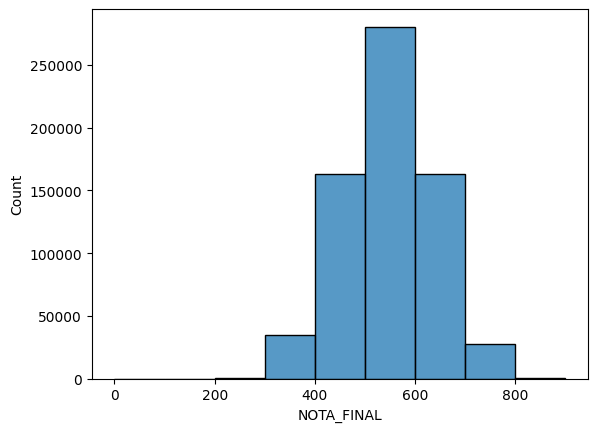

In [39]:
# Visualizando distribuição das notas
import seaborn as sns
sns.histplot(data=df, x="NOTA_FINAL", binwidth=100)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669781 entries, 40 to 3476102
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NU_INSCRICAO        669781 non-null  int64  
 1   TP_FAIXA_ETARIA     669781 non-null  int64  
 2   TP_SEXO             669781 non-null  int64  
 3   TP_ESCOLA           669781 non-null  float64
 4   TP_ENSINO           669781 non-null  float64
 5   Q006                669781 non-null  int64  
 6   COR_RACA_1.0        669781 non-null  bool   
 7   COR_RACA_2.0        669781 non-null  bool   
 8   COR_RACA_3.0        669781 non-null  bool   
 9   COR_RACA_4.0        669781 non-null  bool   
 10  COR_RACA_5.0        669781 non-null  bool   
 11  NACIONALIDADE_1.0   669781 non-null  bool   
 12  NACIONALIDADE_2.0   669781 non-null  bool   
 13  NACIONALIDADE_3.0   669781 non-null  bool   
 14  NACIONALIDADE_4.0   669781 non-null  bool   
 15  REGIAO_CENTROOESTE  669781 non-null  

## Conclusão

Infelizmente, muitas pessoas não respondem alguns campos. Por causa disso, um dataset de mais de 3 milhões de observações foi reduzido para 600 mil observações. Entretanto, ainda é um número considerável para fazer análises, caso a amostra ainda seja representativa.
<br><br>
Além disso, o dataset que originalmente tinha 76 colunas e exigia mais de 2GB de memória agora possui apenas 20 colunas e ocupa 66 MB de memória.

In [42]:
# Salvando dataset
df.to_csv("microdados_tratado.csv", index=False)